In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.csv             
replace dataset.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.xlsx            


Installing Necessary Packages

In [ ]:
!pip install pandas
!pip install hazm
!pip install nltk
!pip install scikit-learn matplotlib
!pip install datasets

In [ ]:
import pandas as pd

file_path = './dataset.csv'
df = pd.read_csv(file_path)
print(df.head())



                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                           Content_1  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...   
2  یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...   
3  گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...   
4  این فیلم روایت گر داستان 

In [ ]:
import pandas as pd

column_names = df.columns.tolist()

print(column_names)


['Link', 'EN_title', 'PENGLISH_title', 'PERSIAN_title', 'Content_1', 'Content_2', 'Score', 'Year', 'Genre', 'Time']


accoring to the dataset explanations Content_1 contains the persian storyline of the movie and Content_2 contains the english storyline of the movie

In [ ]:
import pandas as pd

# Initialize a set to collect unique genres
unique_genres = set()


# Iterate over each row in the 'genre' column
for genres in df['Genre']:
    for genre in genres.split(','):
        unique_genres.add(genre.strip())

# Convert the set to a list
unique_genres_list = list(unique_genres)

# Optionally, sort the list of unique genres
unique_genres_list.sort()

# Print the list of unique genres
print(unique_genres_list)

print(f'number of genres: '+str(len(unique_genres_list)))

['Action', 'Adventure', 'Animation', 'Architecture & Urbanism', 'Arts & Literature', 'Comedy', 'Crime', 'Culture & Traditions', 'Drama', 'Experimental', 'Family', 'History', 'Horror', 'Human Interest & Society', 'Music', 'Mystery', 'Nature & Wildlife', 'Portrait', 'Romance', 'Thriller', 'War']
number of genres: 21


Preprocesses

Normalization for persian

In [ ]:
import re
import unicodedata

def normalize_unicode(text):
    """Normalize Unicode characters to a standard form."""
    return unicodedata.normalize('NFC', text)

def normalize_arabic_persian_characters(text):
    """Normalize Arabic and Persian characters."""
    arabic_to_persian = {
        'ك': 'ک',  # Arabic Kaf to Persian Kaf
        'ي': 'ی',  # Arabic Yeh to Persian Yeh
        'ى': 'ی',  # Arabic Alef Maksura to Persian Yeh
        'ة': 'ه',  # Arabic Teh Marbuta to Persian Heh
        'ؤ': 'و',  # Arabic Waw with Hamza Above to Persian Waw
        'إ': 'ا',  # Arabic Alef with Hamza Below to Persian Alef
        'أ': 'ا',  # Arabic Alef with Hamza Above to Persian Alef
        'ٱ': 'ا',  # Arabic Alef Wasla to Persian Alef
    }
    for arabic_char, persian_char in arabic_to_persian.items():
        text = text.replace(arabic_char, persian_char)
    return text

def normalize_digits(text):
    """Normalize digits."""
    arabic_digits = '۰۱۲۳۴۵۶۷۸۹'
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    digit_mapping = str.maketrans(arabic_digits + persian_digits, english_digits * 2)
    return text.translate(digit_mapping)

def strip_extra_whitespace(text):
    """Strip extra whitespace."""
    return re.sub(r'\s+', ' ', text).strip()

def initial_normalization_persian(text,
                           normalize_unicode_flag=True,
                           normalize_arabic_persian_characters_flag=True,
                           normalize_digits_flag=True,
                           strip_extra_whitespace_flag=True):
    """Normalize Persian text with options to apply specific normalization steps."""
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if normalize_arabic_persian_characters_flag:
        text = normalize_arabic_persian_characters(text)
    if normalize_digits_flag:
        text = normalize_digits(text)
    if strip_extra_whitespace_flag:
        text = strip_extra_whitespace(text)
    return text

# Example usage
example_text = "كتاب‌هاي ى خوبی هستند! ۱۲۳"
normalized_text = initial_normalization_persian(example_text,
                                         normalize_unicode_flag=True,
                                         normalize_arabic_persian_characters_flag=True,
                                         normalize_digits_flag=True,
                                         strip_extra_whitespace_flag=True)
print(normalized_text)  # Output: "کتابهای خوبی هستند 123"



کتاب‌های ی خوبی هستند! 123


In [ ]:
from hazm import Stemmer, Lemmatizer

def final_normalization_persian(text,
                           stem_flag=False,
                           lemmatize_flag=False,
                           handle_suffixes_and_prefixes_flag=False):
    """Normalize Persian text with options to apply stemming, lemmatization, and handling of suffixes and prefixes."""
    # Initialize stemmer and lemmatizer
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    # Stemming
    if stem_flag:
        text = ' '.join(stemmer.stem(word) for word in text.split())

    # Lemmatization
    if lemmatize_flag:
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    # Handling suffixes and prefixes
    if handle_suffixes_and_prefixes_flag:
        # This function can be customized based on specific suffixes and prefixes to handle
        # Currently, it's just a placeholder and does not perform any specific suffix or prefix handling
        pass

    return text

# Example usage
example_text = "کتاب‌ها گذشته‌اند و من می‌خواهم خواندنش را"
normalized_text = final_normalization_persian(example_text,
                                          stem_flag=True,
                                          lemmatize_flag=True,
                                          handle_suffixes_and_prefixes_flag=False)
print(normalized_text)


کتاب گذشت#گذر و من می‌خواه خواندن را


normalize for English

In [ ]:
import re
import string
import unicodedata
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

def normalize_unicode(text):
    """Normalize Unicode characters to a standard form."""
    return unicodedata.normalize('NFKC', text)

def to_lowercase(text):
    """Convert text to lowercase."""
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    """Remove digits from text."""
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    """Remove extra whitespace from text."""
    return re.sub(r'\s+', ' ', text).strip()

def remove_stopwords(text):
    """Remove stop words from text."""
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

def initial_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False):
    """Normalize English text with options to apply specific normalization steps."""
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if to_lowercase_flag:
        text = to_lowercase(text)
    if remove_punctuation_flag:
        text = remove_punctuation(text)
    if remove_digits_flag:
        text = remove_digits(text)
    if remove_extra_whitespace_flag:
        text = remove_extra_whitespace(text)
    if remove_stopwords_flag:
        text = remove_stopwords(text)
    return text

# Example usage
example_text = "This is an Example! Text, with some punctuation. And numbers 12345."
normalized_text = initial_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True)
print(normalized_text)  # Output: "example text punctuation numbers"


example text punctuation numbers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def remove_urls(text):
    """Remove URLs from text."""
    return re.sub(r'http\S+', '', text)

def remove_html_tags(text):
    """Remove HTML tags from text."""
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    """Remove special characters from text."""
    return re.sub(r'[^\w\s]', '', text)

def remove_accented_characters(text):
    """Remove accented characters from text."""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def final_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False,
                           remove_urls_flag=False,
                           remove_html_tags_flag=False,
                           remove_special_characters_flag=False,
                           remove_accented_characters_flag=False,
                           stem_flag=False,
                           lemmatize_flag=False):
    """Normalize English text with options to apply specific preprocessing steps."""
    if remove_urls_flag:
        text = remove_urls(text)
    if remove_html_tags_flag:
        text = remove_html_tags(text)
    if remove_special_characters_flag:
        text = remove_special_characters(text)
    if remove_accented_characters_flag:
        text = remove_accented_characters(text)
    if normalize_unicode_flag:
        text = unicodedata.normalize('NFKC', text)
    if to_lowercase_flag:
        text = text.lower()
    if remove_punctuation_flag:
        text = text.translate(str.maketrans('', '', string.punctuation))
    if remove_digits_flag:
        text = re.sub(r'\d+', '', text)
    if remove_extra_whitespace_flag:
        text = re.sub(r'\s+', ' ', text).strip()
    if remove_stopwords_flag:
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    if stem_flag:
        stemmer = PorterStemmer()
        text = ' '.join(stemmer.stem(word) for word in text.split())
    if lemmatize_flag:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Example usage
example_text = "This is an Example! Text, with some punctuation. And numbers 12345. Visit https://example.com"
normalized_text = final_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True,
                                         remove_urls_flag=True,
                                         remove_html_tags_flag=True,
                                         remove_special_characters_flag=True,
                                         remove_accented_characters_flag=True,
                                         stem_flag=True,
                                         lemmatize_flag=True)
print(normalized_text)  # Output: "exampl text punctuation number visit"


exampl text punctuat number visit


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
genre_mapping = {
    'Drama': 'Drama & Emotion',
    'Romance': 'Drama & Emotion',
    'Mystery': 'Drama & Emotion',
    'Portrait': 'Drama & Emotion',
    'Comedy': 'Comedy & Light-Hearted',
    'Family': 'Comedy & Light-Hearted',
    'Animation': 'Comedy & Light-Hearted',
    'Action': 'Action & Adventure',
    'Crime': 'Action & Adventure',
    'Adventure': 'Action & Adventure',
    'Thriller': 'Action & Adventure',
    'War': 'Action & Adventure',
    'Horror': 'Action & Adventure',
    'Human Interest & Society': 'Culture & Society',
    'Culture & Traditions': 'Culture & Society',
    'History': 'Culture & Society',
    'Architecture & Urbanism': 'Culture & Society',
    'Arts & Literature': 'Arts & Nature',
    'Music': 'Arts & Nature',
    'Nature & Wildlife': 'Arts & Nature',
    'Experimental': 'Arts & Nature'
}

In [ ]:
import pandas as pd

def create_filtered_datasets(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    df['Broad_Genre'] = df['Genre'].map(genre_mapping)

    # Create Persian descriptions dataset by dropping the English description column
    persian_df = df.drop(columns=['Content_2']).rename(columns={'Content_1': 'Description'})

    # Create English descriptions dataset by dropping the Persian description column
    english_df = df.drop(columns=['Content_1']).rename(columns={'Content_2': 'Description'})

    return persian_df, english_df

# Specify the path to your CSV file
file_path = './dataset.csv'

# Call the function to create the filtered datasets
persian_df, english_df = create_filtered_datasets(file_path)

# Print the first few rows of the Persian descriptions dataset
print("Persian Descriptions Dataset:")
print(persian_df.head())

# Print the first few rows of the English descriptions dataset
print("English Descriptions Dataset:")
print(english_df.head())


Persian Descriptions Dataset:
                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                         Description  Score  Year  Genre Time  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...    4.8  2018  Drama   73   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...    3.8  2018  Crime   78   
2  یک تصادف اتومبیل آدم‌هایی را در 

In [ ]:
perisan_genre_counts = persian_df['Broad_Genre'].value_counts()
perisan_genre_counts

Broad_Genre
Drama & Emotion           777
Comedy & Light-Hearted    293
Action & Adventure        221
Culture & Society          97
Arts & Nature              49
Name: count, dtype: int64

Split Datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold


def split_80_10_10(df):
    # Split the data into 80% train, 10% validation, and 10% test
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    return train_df, val_df, test_df

def split_90_10_with_cross_validation(df):
    # Split the data into 90% train and 10% test
    train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

    # Create KFold cross-validator with 10 folds, no shuffling
    kf = KFold(n_splits=10, shuffle=False)

    return train_df, test_df, kf



# Perform 80-10-10 split for Persian descriptions dataset
persian_train_df_80, persian_val_df_10, persian_test_df_10 = split_80_10_10(persian_df)

# Perform 80-10-10 split for English descriptions dataset
english_train_df_80, english_val_df_10, english_test_df_10 = split_80_10_10(english_df)

# Perform 90-10 split with 10-fold cross-validation for Persian descriptions dataset
persian_train_df_90, persian_test_df_10, persian_kf = split_90_10_with_cross_validation(persian_df)

# Perform 90-10 split with 10-fold cross-validation for English descriptions dataset
english_train_df_90, english_test_df_10, english_kf = split_90_10_with_cross_validation(english_df)

# Print the first few rows of the Persian descriptions dataset splits
print("Persian 80-10-10 Split - Train Dataset:")
print(persian_train_df_80.head())

print("\nPersian 80-10-10 Split - Validation Dataset:")
print(persian_val_df_10.head())

print("\nPersian 80-10-10 Split - Test Dataset:")
print(persian_test_df_10.head())

print("\nEnglish 80-10-10 Split - Train Dataset:")
print(english_train_df_80.head())

print("\nEnglish 80-10-10 Split - Validation Dataset:")
print(english_val_df_10.head())

print("\nEnglish 80-10-10 Split - Test Dataset:")
print(english_test_df_10.head())

persian_train_folds_90_10=[]
persian_test_folds_90_10=[]
english_folds_90_10=[]
english_test_folds_90_10=[]

print("\nPersian 90-10 Split - KFold Indices:")
for fold, (train_index, test_index) in enumerate(persian_kf.split(persian_train_df_90)):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_index}...")
    print(f"  Validation indices: {test_index}...")

    persian_train_folds_90_10.append(train_index)
    persian_test_folds_90_10.append(test_index)

print("\nEnglish 90-10 Split - KFold Indices:")
for fold, (train_index, test_index) in enumerate(english_kf.split(english_train_df_90)):
    print(f"Fold {fold}:")
    print(f"  Train indices: {train_index}...")
    print(f"  Validation indices: {test_index}...")

    english_folds_90_10.append(train_index)
    english_test_folds_90_10.append(test_index)



Persian 80-10-10 Split - Train Dataset:
                                                   Link  \
901   https://www.imvbox.com/watch-persian-movie-ira...   
1405  https://www.imvbox.com/watch-persian-movie-ira...   
310   https://www.imvbox.com/watch-persian-movie-ira...   
1146  https://www.imvbox.com/watch-persian-movie-ira...   
31    https://www.imvbox.com/watch-persian-movie-ira...   

                     EN_title    PENGLISH_title  PERSIAN_title  \
901      The Rule of the Game     Ghaedeye Bazi     قاعده بازی   
1405              Kamalolmolk       Kamalolmolk     کمال‌الملک   
310   The Tiger of Mazandaran  Babre Mazandaran   ببر مازندران   
1146             Fire and Fog      Atash Va Meh       آتش و مه   
31                     The 23          23 Nafar  بیست و سه نفر   

                                            Description  Score  Year  \
901   این قصه ی زندگی مردی است، که مثل خیلی از مردها...    4.2  2007   
1405  این گذری است بربخشهایی از زندگی تاریخی"محمد غف...    7.4  

you can access folds of cross validation using these four variables  <br></br>
persian_train_folds_90_10 <br></br>
persian_test_folds_90_10  <br></br>
english_folds_90_10 <br></br>
english_test_folds_90_10

Functions to calculate all necessary metrics for multiclass classification and aggregating metrics in cross validation

F1 Macro: 0.26666666666666666
F1 Micro: 0.3333333333333333
Accuracy: 0.3333333333333333
Precision: 0.2222222222222222
Recall: 0.3333333333333333


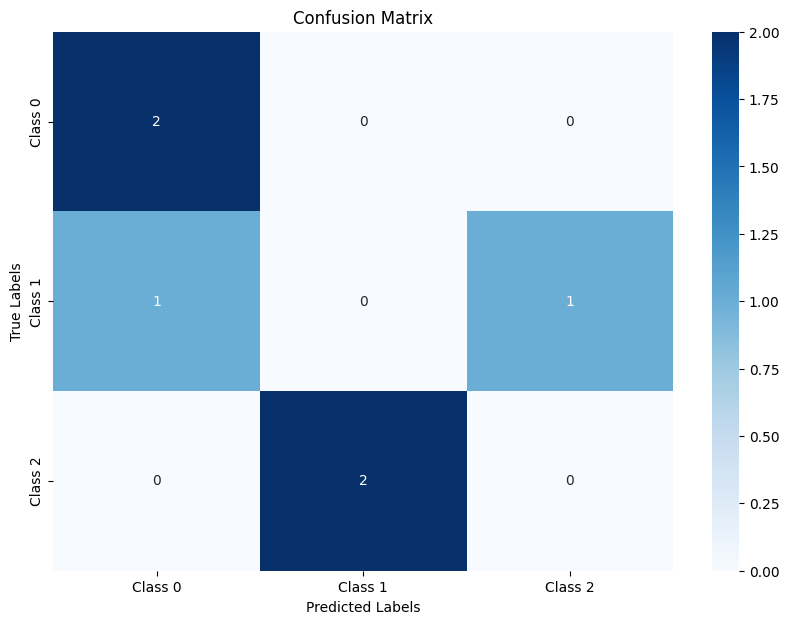

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import math

#the first two functions are for integrating the metrics that we get out of different folds in cross validation as mentioned in the assignment documentation

def calculate_average(numbers):
    if not numbers:
        return None
    return sum(numbers) / len(numbers)


def calculate_standard_deviation(numbers):
    if not numbers:
        return None
    avg = calculate_average(numbers)
    variance = sum((x - avg) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)



# Function to calculate F1 Macro
def f1_macro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='macro')

# Function to calculate F1 Micro
def f1_micro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='micro')

# Function to calculate Accuracy
def accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

# Function to calculate Precision
def precision(true_labels, predicted_labels):
    return precision_score(true_labels, predicted_labels, average='macro')

# Function to calculate Recall
def recall(true_labels, predicted_labels):
    return recall_score(true_labels, predicted_labels, average='macro')

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example data
    true_labels = [0, 1, 2, 0, 1, 2]
    predicted_labels = [0, 2, 1, 0, 0, 1]
    class_names = ['Class 0', 'Class 1', 'Class 2']

    # Calculate metrics
    print("F1 Macro:", f1_macro(true_labels, predicted_labels))
    print("F1 Micro:", f1_micro(true_labels, predicted_labels))
    print("Accuracy:", accuracy(true_labels, predicted_labels))
    print("Precision:", precision(true_labels, predicted_labels))
    print("Recall:", recall(true_labels, predicted_labels))

    # Plot confusion matrix
    plot_confusion_matrix(true_labels, predicted_labels, class_names)


word classification

English dataset

In [ ]:
from datasets import load_dataset

# Load the CoNLL-2003 dataset
dataset = load_dataset('conll2003')

# Split the dataset into train, validation, and test sets
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']


total_len= len(train_dataset) + len(val_dataset) + len(test_dataset)

train_percentage = (len(train_dataset) / total_len ) * 100
val_percentage = (len(val_dataset) / total_len ) * 100
test_percentage = (len(test_dataset) / total_len ) * 100

print(f"Train Percentage: {train_percentage:.2f}%")
print(f"Validation Percentage: {val_percentage:.2f}%")
print(f"Test Percentage: {test_percentage:.2f}%")

Train Percentage: 67.69%
Validation Percentage: 15.67%
Test Percentage: 16.65%


Since conll 2003 has this default split, we do not split with a 80-10-10 anymore, as mentioned in the assignment file

data preparation for training

In [ ]:
from datasets import load_dataset

def prepare_conll_data(split):
    # Load the CoNLL-2003 dataset
    dataset = load_dataset('conll2003')

    # Extract sentences and labels from the specified split
    sentences = [example['tokens'] for example in dataset[split]]
    labels = [example['ner_tags'] for example in dataset[split]]

    return sentences, labels


train_sentences, train_labels = prepare_conll_data('train')
valid_sentences, valid_labels = prepare_conll_data('validation')
test_sentences, test_labels = prepare_conll_data('test')

# Print the first few examples
print("Training sentences:", train_sentences[:3])
print("Training labels:", train_labels[:3])


Training sentences: [['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], ['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22']]
Training labels: [[3, 0, 7, 0, 0, 0, 7, 0, 0], [1, 2], [5, 0]]


data preparation of persian dataset

In [ ]:
!unzip arman.zip

Archive:  arman.zip
replace arman-labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: arman-labels.txt        
replace arman-tokens.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: arman-tokens.txt        
replace peyma-labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: peyma-labels.txt        
replace peyma-tokens.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: peyma-tokens.txt        


don't forget to test word classification on 10 persian and 10 english film names

In [ ]:
def read_tokens_and_labels(tokens_file_path, labels_file_path):
    # Initialize lists to store sentences and labels
    sentences = []
    labels = []

    # Open and read the tokens and labels files with error handling for encoding issues
    with open(tokens_file_path, 'r', encoding='utf-8', errors='replace') as tokens_file, \
         open(labels_file_path, 'r', encoding='utf-8', errors='replace') as labels_file:

        # Read all lines from both files
        token_lines = tokens_file.readlines()
        label_lines = labels_file.readlines()

        # Ensure both files have the same number of lines
        assert len(token_lines) == len(label_lines), "Files must have the same number of lines."

        # Process each line
        for token_line, label_line in zip(token_lines, label_lines):
            # Split the lines into tokens and labels
            tokens = token_line.strip().split()
            labels_ = label_line.strip().split()

            # Ensure each line has the same number of tokens and labels
            assert len(tokens) == len(labels_), "Each line must have the same number of tokens and labels."

            sentences.append(tokens)
            labels.append(labels_)

    # Flatten the list of sentences and labels for the DataFrame
    flat_tokens = [token for sentence in sentences for token in sentence]
    flat_labels = [label for label_list in labels for label in label_list]

    # Create a DataFrame
    df = pd.DataFrame({'Token': flat_tokens, 'Label': flat_labels})

    return df


tokens_file_path = 'arman-tokens.txt'
labels_file_path = 'arman-labels.txt'
df = read_tokens_and_labels(tokens_file_path, labels_file_path)



# Save the DataFrame to a CSV file
df.to_csv('arman_dataset.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

# Function to read CSV into DataFrame
def read_csv(file_path):
    return pd.read_csv(file_path)

# Function for 80-10-10 split
def split_80_10_10(df):
    train_val_df, test_df = train_test_split(df, test_size=0.10, random_state=42)
    train_df, val_df = train_test_split(train_val_df, test_size=0.11, random_state=42) # 0.11 * 0.9 ≈ 0.10
    return train_df, val_df, test_df

# Function for 90-10 split
def split_90_10(df):
    train_df, test_df = train_test_split(df, test_size=0.10, random_state=42)
    return train_df, test_df

# Function for 10-fold cross-validation on the 90-10 split
def cross_validation_10_folds(df):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_data = []
    for train_index, test_index in kf.split(df):
        train_df = df.iloc[train_index]
        test_df = df.iloc[test_index]
        fold_data.append((train_df, test_df))
    return fold_data

# Read the CSV file
file_path = 'arman_dataset.csv'
df = read_csv(file_path)

# Perform 80-10-10 split
train_df_80_10_10, val_df_80_10_10, test_df_80_10_10 = split_80_10_10(df)
print("80-10-10 split:")
print(f"Train set size: {len(train_df_80_10_10)}")
print(f"Validation set size: {len(val_df_80_10_10)}")
print(f"Test set size: {len(test_df_80_10_10)}")

# Perform 90-10 split
train_df_90_10, test_df_90_10 = split_90_10(df)
print("\n90-10 split:")
print(f"Train set size: {len(train_df_90_10)}")
print(f"Test set size: {len(test_df_90_10)}")




# Perform 10-fold cross-validation on the 90-10 split
fold_data = cross_validation_10_folds(train_df_90_10)
print("\n10-fold cross-validation on the 90-10 split:")

train_folds_90_10 = []
test_folds_90_10 = []

for i, (train_fold, test_fold) in enumerate(fold_data):
    print(f"Fold {i+1}:")
    print(f"Train fold size: {len(train_fold)}")
    print(f"Validation fold size: {len(test_fold)}")
    train_folds_90_10.append(train_fold)
    test_folds_90_10.append(test_fold)





80-10-10 split:
Train set size: 600740
Validation set size: 74249
Test set size: 74999

90-10 split:
Train set size: 674989
Test set size: 74999

10-fold cross-validation on the 90-10 split:
Fold 1:
Train fold size: 607490
Validation fold size: 67499
Fold 2:
Train fold size: 607490
Validation fold size: 67499
Fold 3:
Train fold size: 607490
Validation fold size: 67499
Fold 4:
Train fold size: 607490
Validation fold size: 67499
Fold 5:
Train fold size: 607490
Validation fold size: 67499
Fold 6:
Train fold size: 607490
Validation fold size: 67499
Fold 7:
Train fold size: 607490
Validation fold size: 67499
Fold 8:
Train fold size: 607490
Validation fold size: 67499
Fold 9:
Train fold size: 607490
Validation fold size: 67499
Fold 10:
Train fold size: 607491
Validation fold size: 67498


## With Genre:

### tf-idf:

In [ ]:
persian_stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

In [ ]:
english_train_val_df = pd.concat([english_train_df_80, english_val_df_10])
persian_train_val_df = pd.concat([english_train_df_80, english_val_df_10])

english_X_train_val = english_train_val_df['Description'].fillna('')
english_y_train_val = english_train_val_df['Genre']
english_X_test = english_test_df_10['Description'].fillna('')
english_y_test = english_test_df_10['Genre']

persian_X_train_val = persian_train_val_df['Description'].fillna('')
persian_y_train_val = persian_train_val_df['Genre']
persian_X_test = persian_test_df_10['Description'].fillna('')
persian_y_test = persian_test_df_10['Genre']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

english_tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
persian_tfidf_vectorizer = TfidfVectorizer(stop_words=persian_stop_words, max_features=5000)

english_X_train_val_tfidf = english_tfidf_vectorizer.fit_transform(english_X_train_val)
english_X_test_tfidf = english_tfidf_vectorizer.transform(english_X_test)

persian_X_train_val_tfidf = persian_tfidf_vectorizer.fit_transform(persian_X_train_val)
persian_X_test_tfidf = persian_tfidf_vectorizer.transform(persian_X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['اثر', 'البت', 'بالای', 'برابر', 'براساس', 'برای', 'بیرون', 'تر', 'تول', 'توی', 'تی', 'جلوی', 'حدود', 'خارج', 'دنبال', 'روی', 'زیر', 'سری', 'سمت', 'سوی', 'شش', 'ضد', 'طبق', 'عقب', 'عل', 'عنوان', 'قصد', 'لطفا', 'مد', 'نداشته', 'نزد', 'نزدیک', 'وسط', 'پاعین', 'کنار'] not in stop_words.
  warnings.warn(


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

english_log_reg = LogisticRegression(max_iter=200)
english_log_reg.fit(english_X_train_val_tfidf, english_y_train_val)

persian_log_reg = LogisticRegression(max_iter=200)
persian_log_reg.fit(persian_X_train_val_tfidf, persian_y_train_val)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

english_y_pred = english_log_reg.predict(english_X_test_tfidf)

english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.6180555555555556
English Classification Report:
                          precision    recall  f1-score   support

                  Action       1.00      0.20      0.33         5
               Adventure       0.00      0.00      0.00         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.00      0.00      0.00         4
                  Comedy       1.00      0.21      0.35        28
                   Crime       0.00      0.00      0.00         6
    Culture & Traditions       1.00      0.33      0.50         3
                   Drama       0.60      1.00      0.75        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       0.00      0.00      0.00         6
                   Music       0.00      0.00      0.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
persian_y_pred = persian_log_reg.predict(persian_X_test_tfidf)

persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5625
Persian Classification Report:
                          precision    recall  f1-score   support

                  Action       0.00      0.00      0.00         5
               Adventure       0.00      0.00      0.00         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.00      0.00      0.00         4
                  Comedy       0.00      0.00      0.00        28
                   Crime       0.00      0.00      0.00         6
    Culture & Traditions       0.00      0.00      0.00         3
                   Drama       0.56      1.00      0.72        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       0.00      0.00      0.00         6
                   Music       0.00      0.00      0.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

                ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


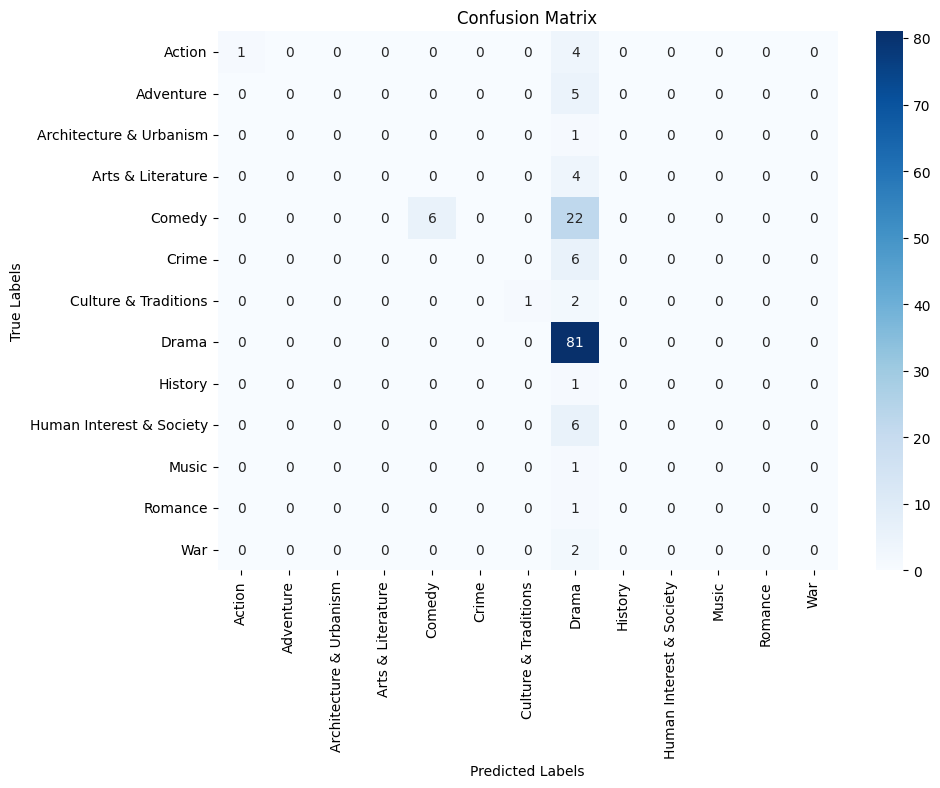

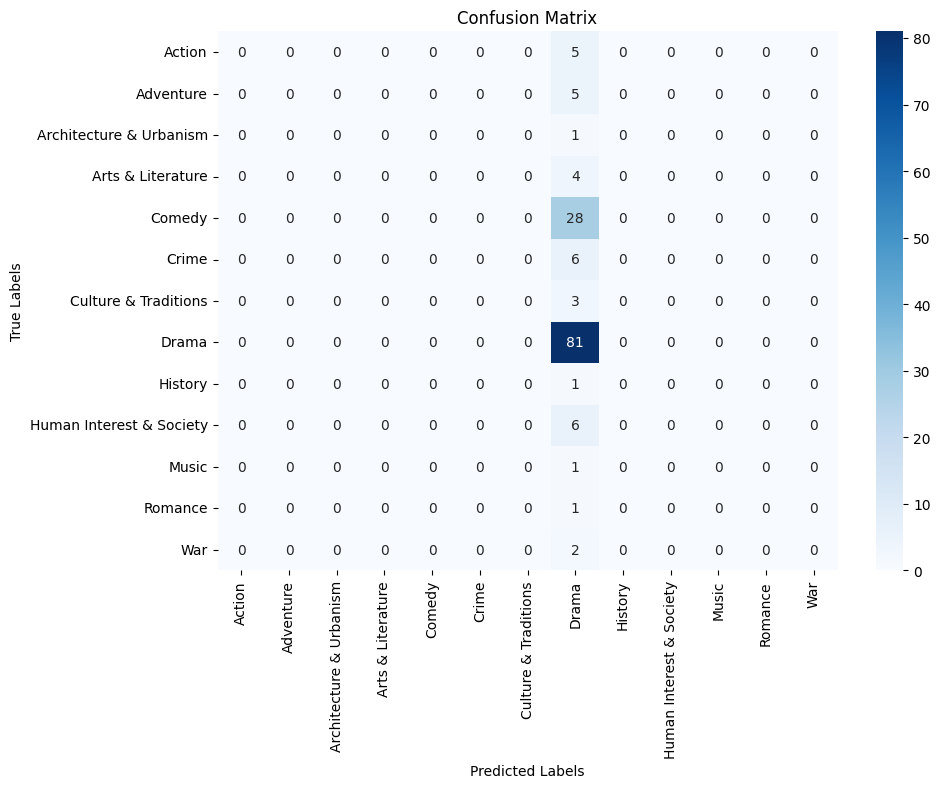

In [ ]:
english_class_names = sorted(english_test_df_10['Genre'].unique())
persian_class_names = sorted(persian_test_df_10['Genre'].unique())

plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

### Linear - SVC

In [ ]:
from sklearn.svm import LinearSVC

english_log_svc = LinearSVC(max_iter=2000)
english_log_svc.fit(english_X_train_val_tfidf, english_y_train_val)

persian_log_svc = LinearSVC(max_iter=2000)
persian_log_svc.fit(persian_X_train_val_tfidf, persian_y_train_val)

LinearSVC(max_iter=2000)

In [ ]:
english_y_pred = english_log_svc.predict(english_X_test_tfidf)

english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.7569444444444444
English Classification Report:
                          precision    recall  f1-score   support

                  Action       1.00      0.20      0.33         5
               Adventure       1.00      0.80      0.89         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.60      0.75      0.67         4
                  Comedy       0.82      0.50      0.62        28
                   Crime       1.00      0.17      0.29         6
    Culture & Traditions       0.75      1.00      0.86         3
                   Drama       0.73      0.98      0.84        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       1.00      0.50      0.67         6
                   Music       1.00      1.00      1.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
persian_y_pred = persian_log_svc.predict(persian_X_test_tfidf)

persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5625
Persian Classification Report:
                          precision    recall  f1-score   support

                  Action       0.00      0.00      0.00         5
               Adventure       0.00      0.00      0.00         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.00      0.00      0.00         4
                  Comedy       0.00      0.00      0.00        28
                   Crime       0.00      0.00      0.00         6
    Culture & Traditions       0.00      0.00      0.00         3
                   Drama       0.56      1.00      0.72        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       0.00      0.00      0.00         6
                   Music       0.00      0.00      0.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

                ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


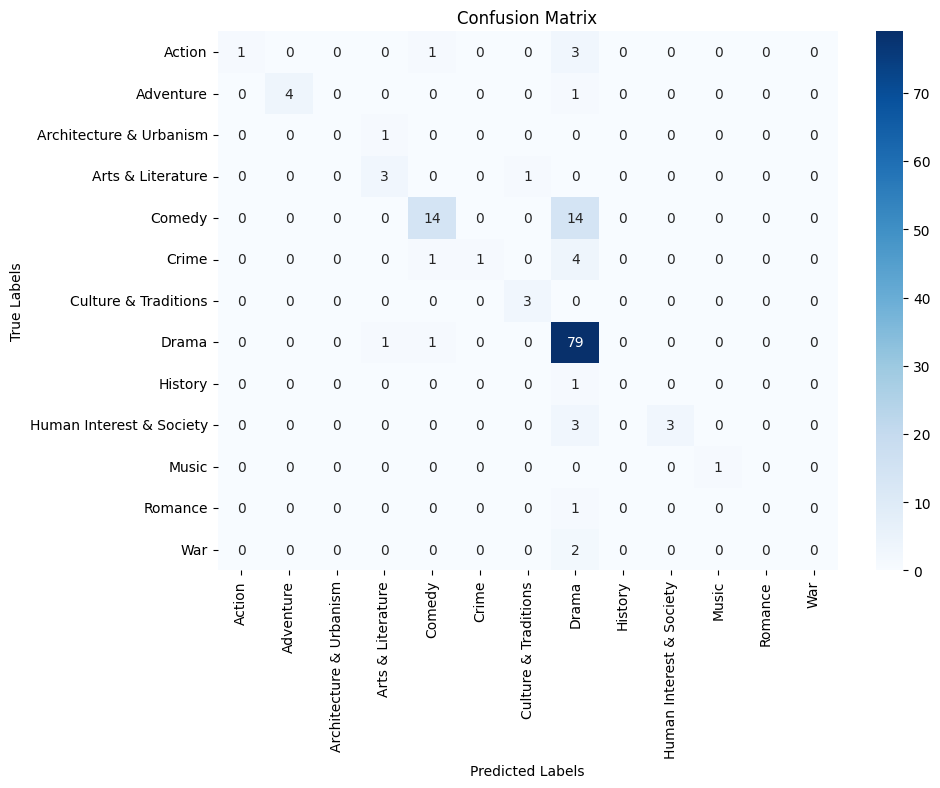

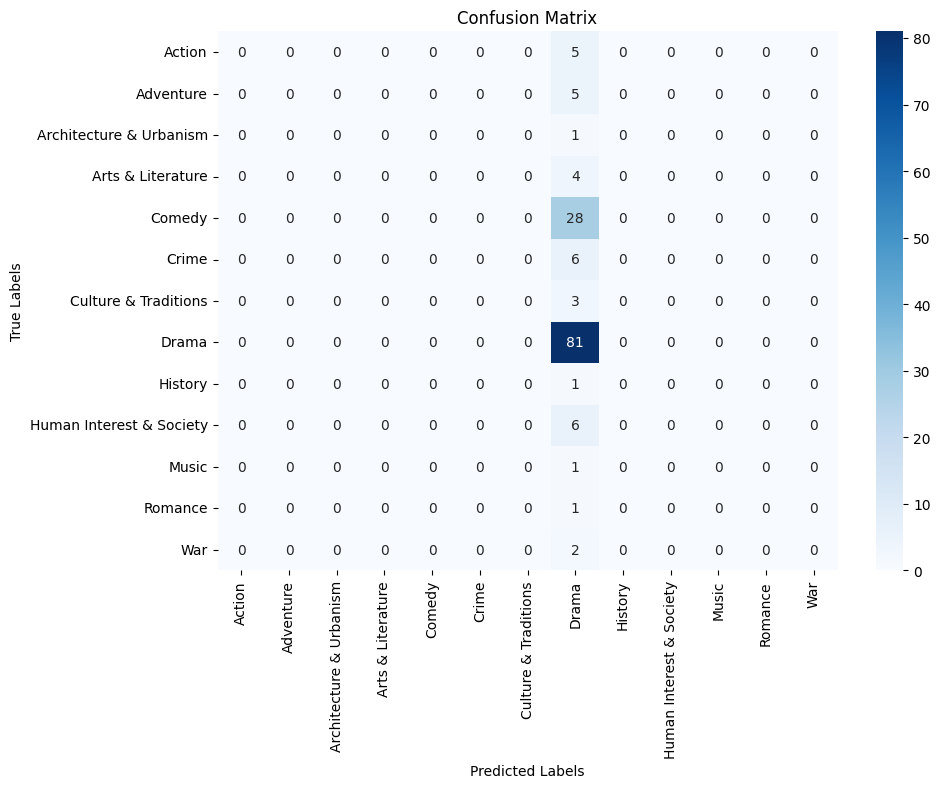

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

english_naive_bayes = MultinomialNB()
english_naive_bayes.fit(english_X_train_val_tfidf, english_y_train_val)

persian_naive_bayes = MultinomialNB()
persian_naive_bayes.fit(persian_X_train_val_tfidf, persian_y_train_val)

MultinomialNB()

In [ ]:
english_y_pred = english_naive_bayes.predict(english_X_test_tfidf)

english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.5694444444444444
English Classification Report:
                          precision    recall  f1-score   support

                  Action       0.00      0.00      0.00         5
               Adventure       0.00      0.00      0.00         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.00      0.00      0.00         4
                  Comedy       1.00      0.04      0.07        28
                   Crime       0.00      0.00      0.00         6
    Culture & Traditions       0.00      0.00      0.00         3
                   Drama       0.57      1.00      0.72        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       0.00      0.00      0.00         6
                   Music       0.00      0.00      0.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
persian_y_pred = persian_naive_bayes.predict(persian_X_test_tfidf)

persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5625
Persian Classification Report:
                          precision    recall  f1-score   support

                  Action       0.00      0.00      0.00         5
               Adventure       0.00      0.00      0.00         5
 Architecture & Urbanism       0.00      0.00      0.00         1
       Arts & Literature       0.00      0.00      0.00         4
                  Comedy       0.00      0.00      0.00        28
                   Crime       0.00      0.00      0.00         6
    Culture & Traditions       0.00      0.00      0.00         3
                   Drama       0.56      1.00      0.72        81
                 History       0.00      0.00      0.00         1
Human Interest & Society       0.00      0.00      0.00         6
                   Music       0.00      0.00      0.00         1
                 Romance       0.00      0.00      0.00         1
                     War       0.00      0.00      0.00         2

                ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


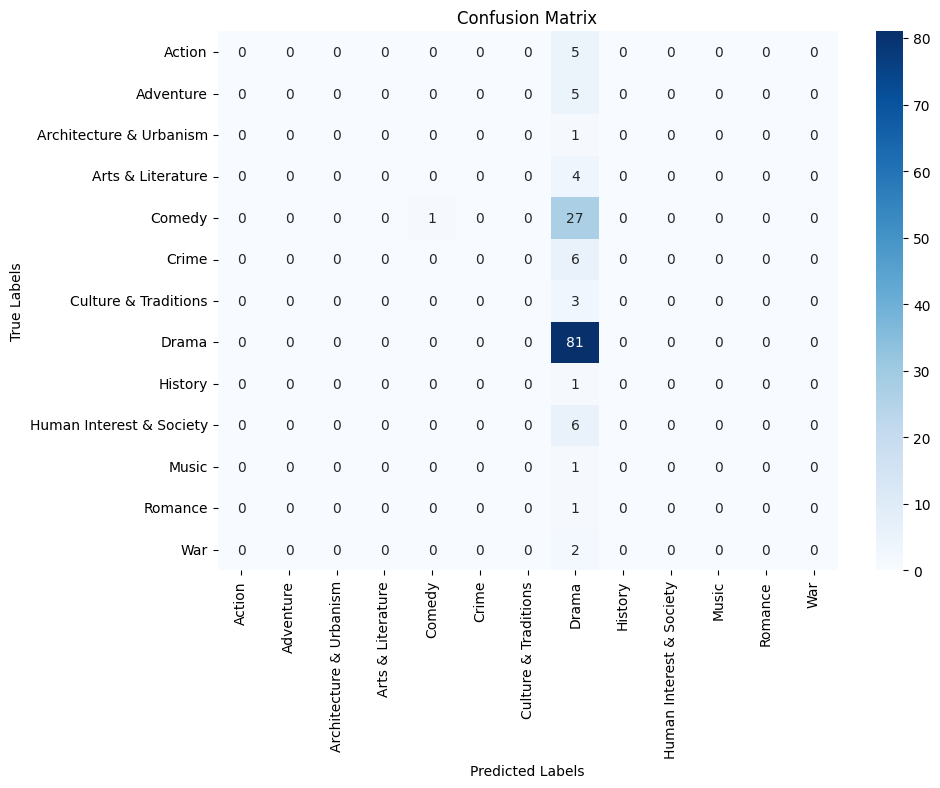

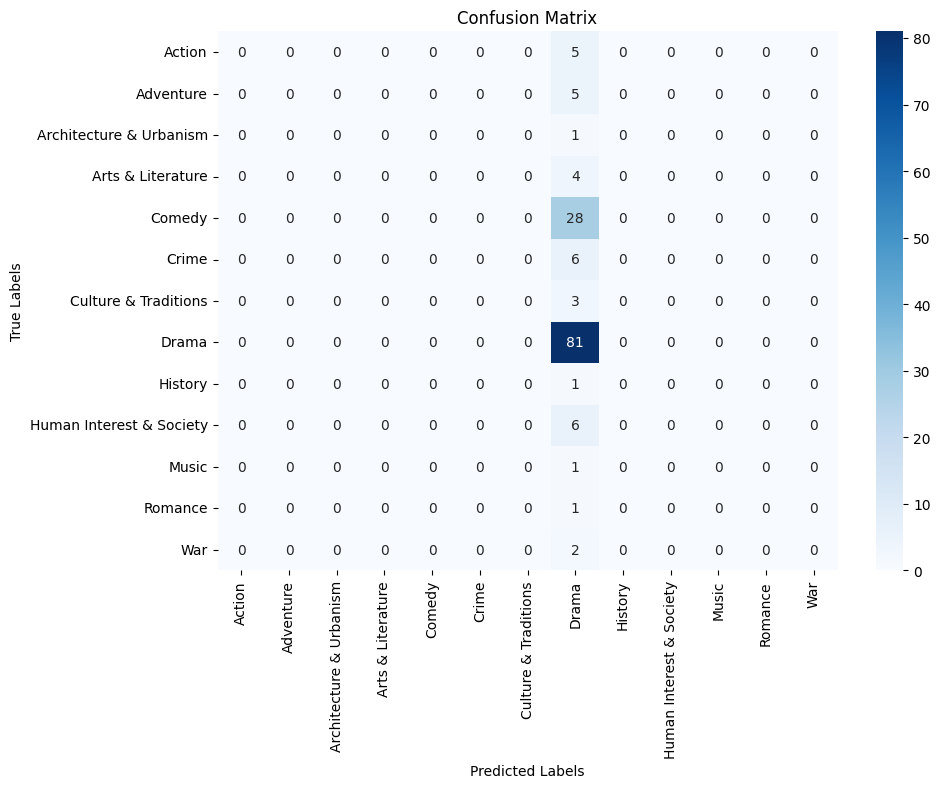

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

## With Broad Genre:

In [ ]:
english_y_train_val = english_train_val_df['Broad_Genre']
english_y_test = english_test_df_10['Broad_Genre']

In [ ]:
persian_y_train_val = persian_train_val_df['Broad_Genre']
persian_y_test = persian_test_df_10['Broad_Genre']

In [ ]:
english_X_train_val_tfidf = english_tfidf_vectorizer.fit_transform(english_X_train_val)
english_X_test_tfidf = english_tfidf_vectorizer.transform(english_X_test)

persian_X_train_val_tfidf = persian_tfidf_vectorizer.fit_transform(persian_X_train_val)
persian_X_test_tfidf = persian_tfidf_vectorizer.transform(persian_X_test)

In [ ]:
english_log_reg.fit(english_X_train_val_tfidf, english_y_train_val)
persian_log_reg.fit(persian_X_train_val_tfidf, persian_y_train_val)

LogisticRegression(max_iter=200)

In [ ]:
english_y_pred = english_log_reg.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.6736111111111112
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       1.00      0.17      0.29        18
         Arts & Nature       1.00      0.20      0.33         5
Comedy & Light-Hearted       1.00      0.25      0.40        28
     Culture & Society       1.00      0.36      0.53        11
       Drama & Emotion       0.64      1.00      0.78        82

              accuracy                           0.67       144
             macro avg       0.93      0.40      0.47       144
          weighted avg       0.79      0.67      0.61       144



In [ ]:
persian_y_pred = persian_log_reg.predict(persian_X_test_tfidf)
persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5694444444444444
Persian Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00        18
         Arts & Nature       0.00      0.00      0.00         5
Comedy & Light-Hearted       0.00      0.00      0.00        28
     Culture & Society       0.00      0.00      0.00        11
       Drama & Emotion       0.57      1.00      0.73        82

              accuracy                           0.57       144
             macro avg       0.11      0.20      0.15       144
          weighted avg       0.32      0.57      0.41       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
english_class_names = sorted(english_test_df_10['Broad_Genre'].unique())
persian_class_names = sorted(persian_test_df_10['Broad_Genre'].unique())

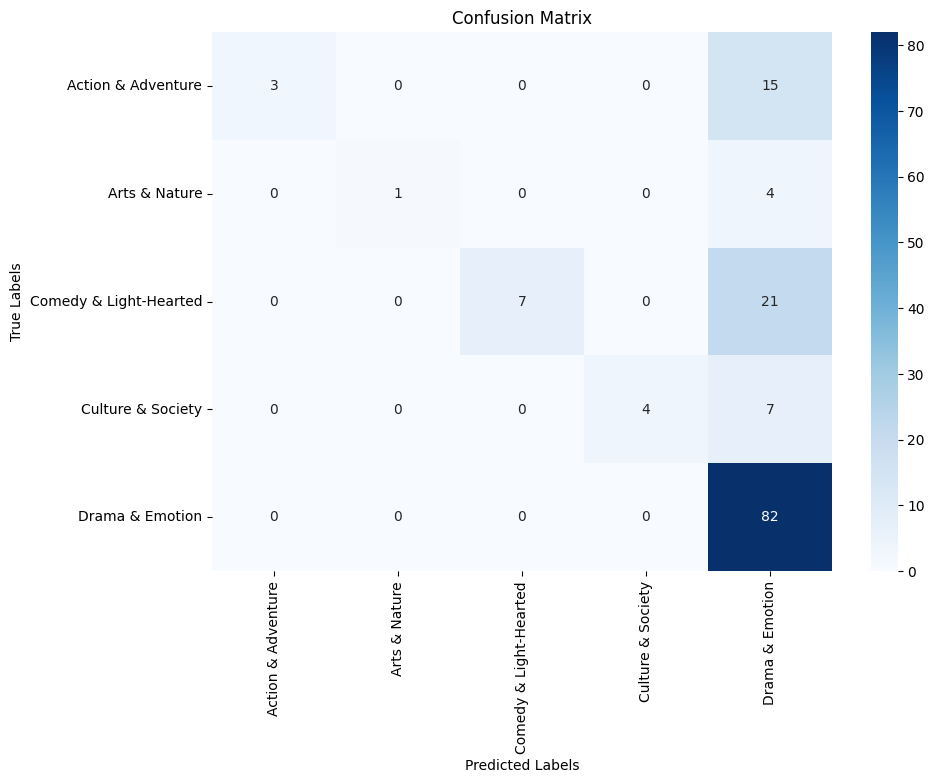

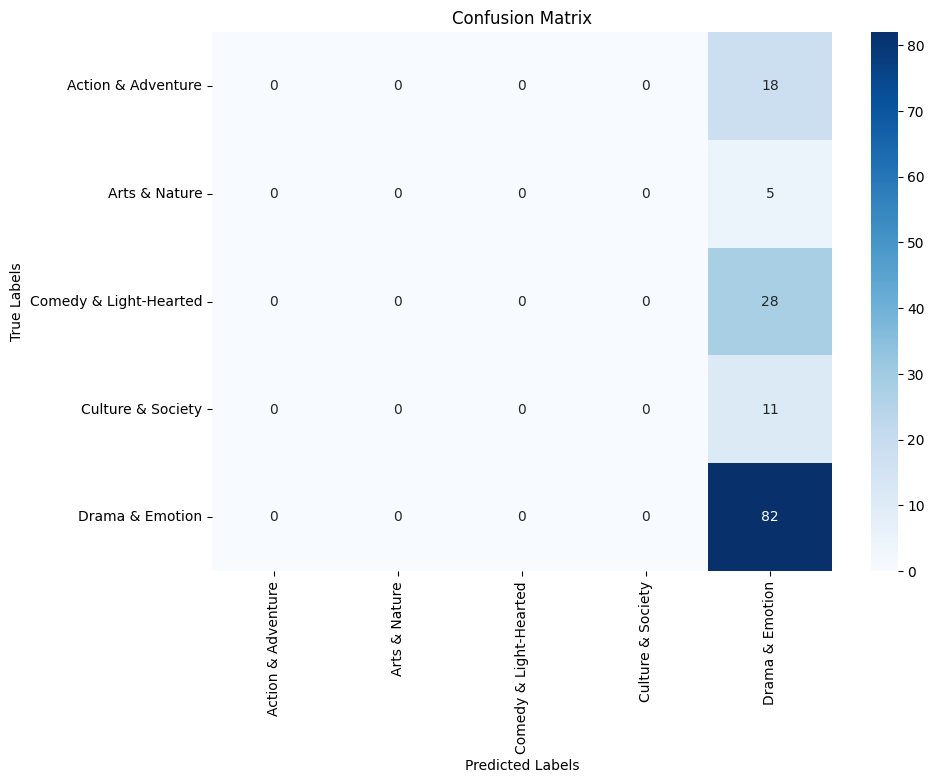

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

In [ ]:
english_log_svc.fit(english_X_train_val_tfidf, english_y_train_val)
persian_log_svc.fit(persian_X_train_val_tfidf, persian_y_train_val)

LinearSVC(max_iter=2000)

In [ ]:
english_y_pred = english_log_svc.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.75
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.70      0.39      0.50        18
         Arts & Nature       0.80      0.80      0.80         5
Comedy & Light-Hearted       0.80      0.43      0.56        28
     Culture & Society       0.88      0.64      0.74        11
       Drama & Emotion       0.74      0.95      0.83        82

              accuracy                           0.75       144
             macro avg       0.78      0.64      0.68       144
          weighted avg       0.76      0.75      0.73       144



In [ ]:
persian_y_pred = persian_log_svc.predict(persian_X_test_tfidf)
persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5763888888888888
Persian Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00        18
         Arts & Nature       0.00      0.00      0.00         5
Comedy & Light-Hearted       1.00      0.04      0.07        28
     Culture & Society       0.00      0.00      0.00        11
       Drama & Emotion       0.57      1.00      0.73        82

              accuracy                           0.58       144
             macro avg       0.31      0.21      0.16       144
          weighted avg       0.52      0.58      0.43       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


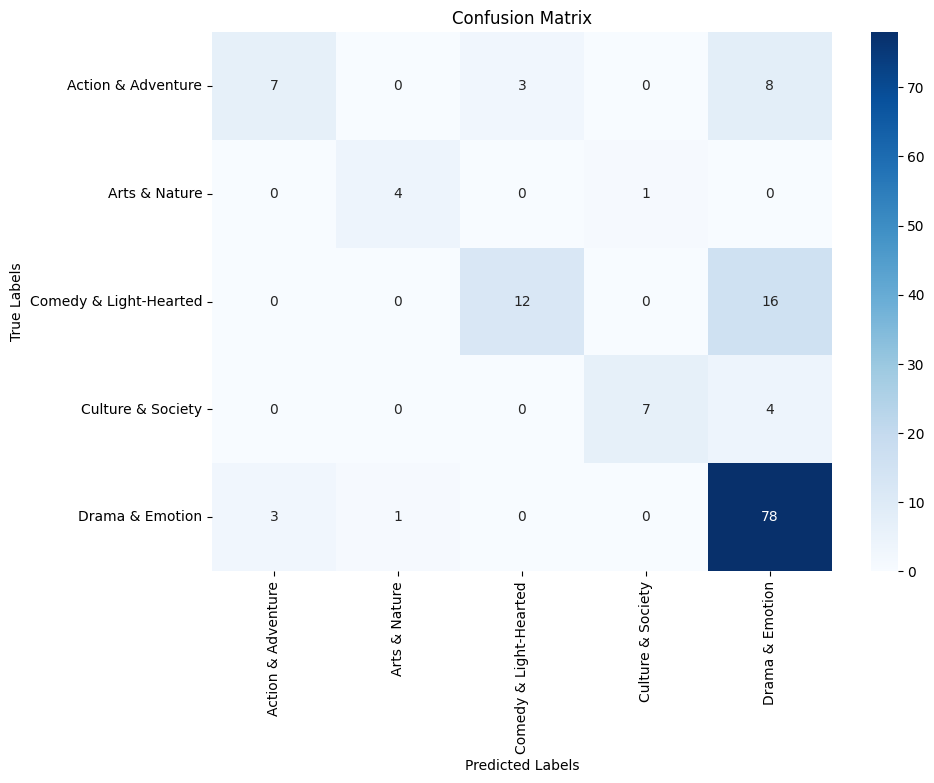

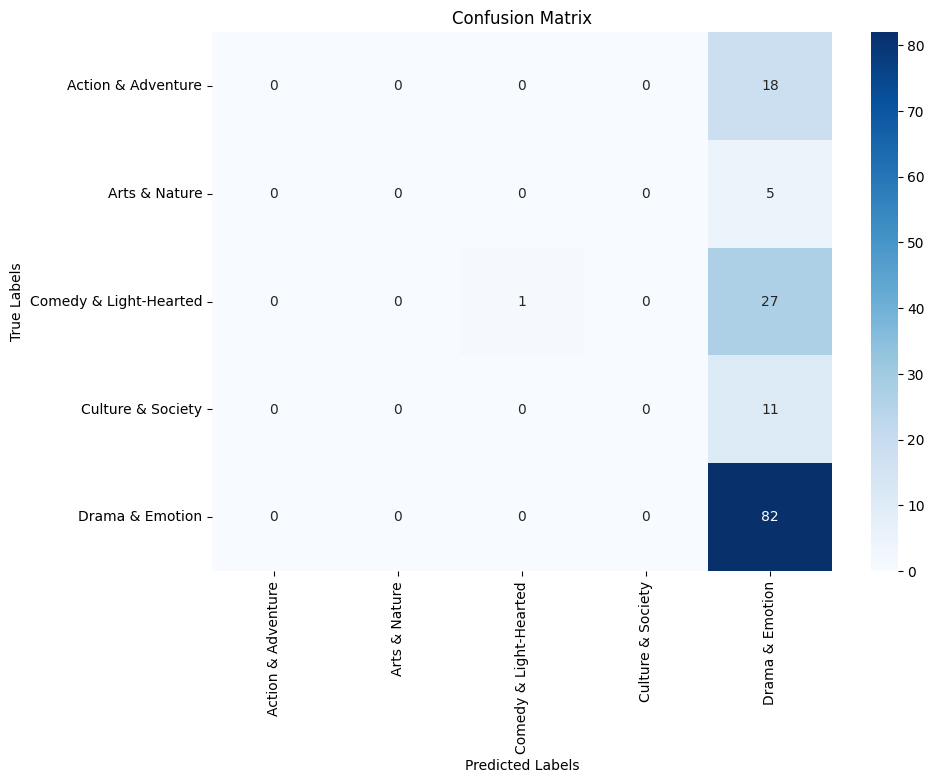

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

In [ ]:
english_naive_bayes.fit(english_X_train_val_tfidf, english_y_train_val)
persian_naive_bayes.fit(persian_X_train_val_tfidf, persian_y_train_val)

MultinomialNB()

In [ ]:
english_y_pred = english_naive_bayes.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.5833333333333334
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00        18
         Arts & Nature       0.00      0.00      0.00         5
Comedy & Light-Hearted       1.00      0.04      0.07        28
     Culture & Society       0.00      0.00      0.00        11
       Drama & Emotion       0.57      1.00      0.73        82

              accuracy                           0.58       144
             macro avg       0.31      0.21      0.16       144
          weighted avg       0.52      0.58      0.43       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
persian_y_pred = persian_naive_bayes.predict(persian_X_test_tfidf)
persian_accuracy = accuracy_score(persian_y_test, persian_y_pred)
persian_classification_rep = classification_report(persian_y_test, persian_y_pred)

print(f"Persian Accuracy: {persian_accuracy}")
print("Persian Classification Report:")
print(persian_classification_rep)

Persian Accuracy: 0.5694444444444444
Persian Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00        18
         Arts & Nature       0.00      0.00      0.00         5
Comedy & Light-Hearted       0.00      0.00      0.00        28
     Culture & Society       0.00      0.00      0.00        11
       Drama & Emotion       0.57      1.00      0.73        82

              accuracy                           0.57       144
             macro avg       0.11      0.20      0.15       144
          weighted avg       0.32      0.57      0.41       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


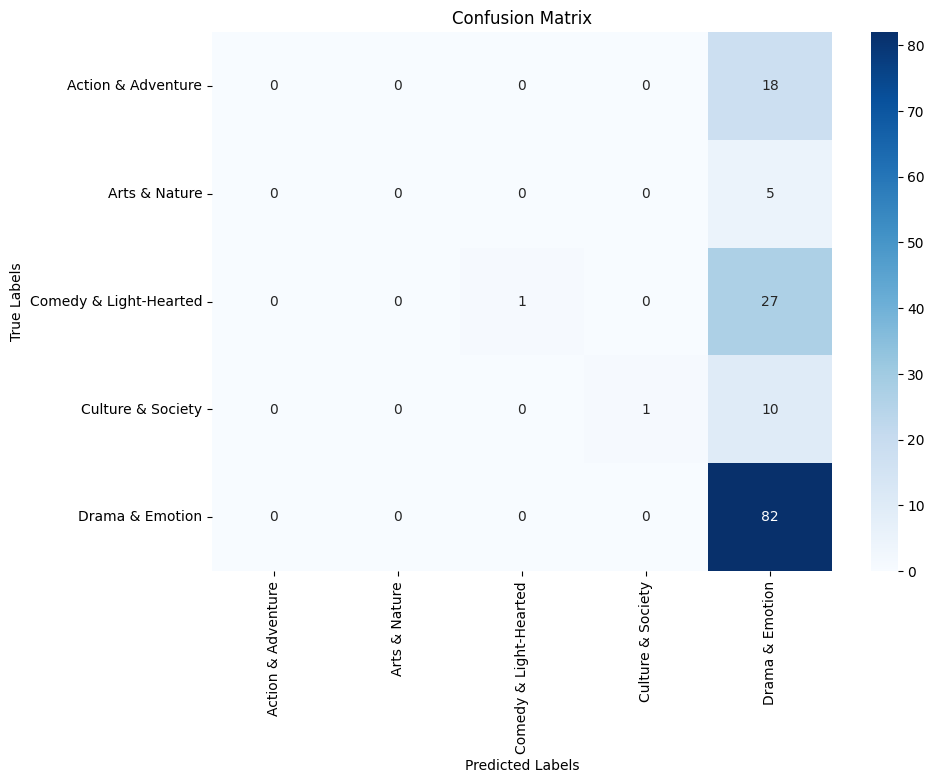

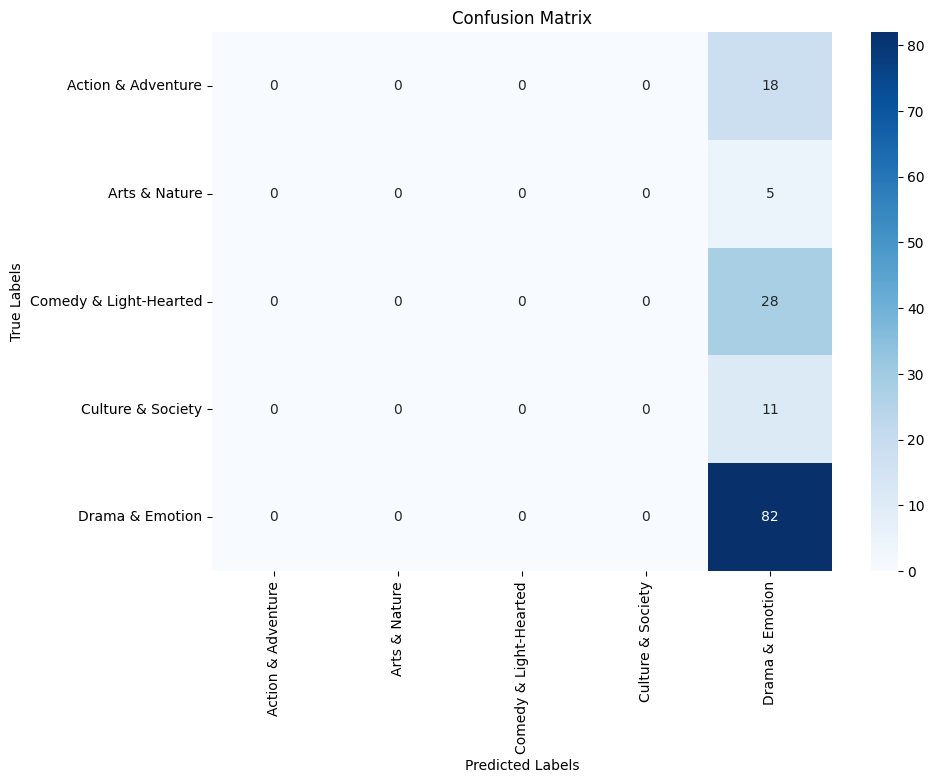

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)
plot_confusion_matrix(persian_y_test, persian_y_pred, persian_class_names)

### Out of Distribution

In [ ]:
drama_movies = [
    "A young girl battles terminal illness while her family struggles to come to terms with their impending loss.",
    "An aging boxer seeks redemption as he trains a young protégé, facing his own past failures along the way.",
    "A musician grapples with deafness, discovering the resilience to pursue his passion despite overwhelming odds.",
    "A single mother sacrifices everything to ensure her daughter’s future, navigating love, loss, and perseverance.",
    "A disillusioned writer returns to his hometown, confronting old wounds and rekindling lost relationships.",
    "A teacher in an inner-city school fights to inspire hope in her students amidst violence and poverty.",
    "A talented chef faces a personal and professional crisis, finding solace in a rekindled family bond.",
    "A teenager with a troubled past finds solace and direction through the mentorship of an unlikely friend.",
    "A high-powered lawyer rethinks his life choices when he reconnects with an old flame in his rural hometown.",
    "A man battles with guilt and forgiveness after a tragic accident alters his family forever.",
    "A father and daughter navigate the challenges of life on the margins of society, relying on each other for survival.",
    "A young athlete overcomes societal and familial expectations to follow his true passion.",
    "A soldier returns home with PTSD, struggling to reintegrate into civilian life and reconnect with loved ones.",
    "A woman re-evaluates her life after an unexpected diagnosis, finding new purpose and meaning.",
    "A family confronts their patriarch’s hidden past when a long-lost relative appears out of the blue.",
    "A young couple deals with the fallout of an unexpected pregnancy while balancing their dreams and responsibilities.",
    "A once-famous actor battles alcoholism and attempts a comeback, reflecting on his tumultuous career.",
    "A man searches for his biological parents, uncovering secrets that change his understanding of family.",
    "A gifted pianist faces the pressures of competition and the demands of a perfectionist father.",
    "A woman rebuilds her life after escaping an abusive relationship, finding strength in unexpected places.",
    "A passionate activist fights for social justice, facing personal and political challenges along the way.",
    "A novelist deals with writer’s block and the pressures of fame while coping with personal demons.",
    "A doctor wrestles with the ethics of her profession after a controversial decision affects a patient’s life.",
    "A troubled teen finds redemption and purpose through a community service program.",
    "A family’s secrets unravel during a tense Thanksgiving reunion, forcing them to confront their past.",
    "A promising football player struggles with the impact of a career-ending injury and finding a new path.",
    "A woman rediscovers her identity after the death of her husband, embarking on a journey of self-discovery.",
    "A struggling artist finds unexpected inspiration in an unlikely muse, changing both their lives.",
    "A man reconnects with his estranged brother after their father’s death, uncovering old resentments and new understandings.",
    "A college student balances academic pressures and familial expectations while pursuing her own dreams.",
    "A couple faces the trials of infertility, exploring the depths of their relationship and hope.",
    "A journalist uncovers corruption in her hometown, risking her career and personal safety.",
    "A former child prodigy returns home to care for her ailing mother, rediscovering her passion and purpose.",
    "A prisoner on death row finds redemption through an unexpected friendship with a prison guard.",
    "A devoted teacher helps a struggling student unlock his potential, changing both their lives forever."
]

comedy_movies = [
    "A bumbling detective hilariously stumbles his way through a major case, accidentally solving it despite his constant mishaps.",
    "Two clueless friends start a dog-walking business, leading to a series of comedic disasters and unexpected adventures.",
    "A quirky family must navigate the hilarity of living together again when their eccentric grandmother moves in.",
    "A hopeless romantic's awkward attempts at dating lead to laugh-out-loud moments and unexpected romance.",
    "A group of college misfits hatch a series of outlandish schemes to save their beloved campus hangout from closure.",
    "A down-on-his-luck magician’s ridiculous tricks accidentally turn him into a viral sensation overnight.",
    "An over-the-top wedding planner faces a comical series of disasters while trying to pull off the perfect wedding.",
    "A man’s attempts to impress his in-laws with his cooking skills result in a kitchen catastrophe and side-splitting chaos.",
    "A group of mismatched co-workers must band together to win a hilarious office competition and save their jobs.",
    "A novice ghost hunter’s bungling efforts lead to uproarious encounters with not-so-spooky spirits."
]

war_action_movies = [
    "A fearless commando leads a daring raid behind enemy lines, unleashing a whirlwind of explosive action and intense combat.",
    "A skilled fighter pilot battles enemy forces in high-octane dogfights, navigating a sky filled with bullets and missiles.",
    "A group of elite soldiers embarks on a covert mission to rescue hostages, facing relentless gunfire and deadly ambushes.",
    "A seasoned warrior returns to the battlefield, orchestrating a strategic assault that culminates in an epic showdown.",
    "A squad of determined marines fights their way through a war-torn city, engaging in brutal hand-to-hand combat and tactical warfare."
]

In [ ]:
movie_data = [(desc, 'Drama & Emotion') for desc in drama_movies] + \
             [(desc, 'Comedy & Light-Hearted') for desc in comedy_movies] + \
             [(desc, 'Action & Adventure') for desc in war_action_movies]

df = pd.DataFrame(movie_data, columns=['description', 'Broad_Genre'])


In [ ]:
df.head(10)

,description,Broad_Genre
0,A young girl battles terminal illness while he...,Drama & Emotion
1,An aging boxer seeks redemption as he trains a...,Drama & Emotion
2,"A musician grapples with deafness, discovering...",Drama & Emotion
3,A single mother sacrifices everything to ensur...,Drama & Emotion
4,A disillusioned writer returns to his hometown...,Drama & Emotion
5,A teacher in an inner-city school fights to in...,Drama & Emotion
6,A talented chef faces a personal and professio...,Drama & Emotion
7,A teenager with a troubled past finds solace a...,Drama & Emotion
8,A high-powered lawyer rethinks his life choice...,Drama & Emotion
9,A man battles with guilt and forgiveness after...,Drama & Emotion


In [ ]:
english_X_test = df['description']
english_y_test = df['Broad_Genre']

In [ ]:
english_X_test_tfidf = english_tfidf_vectorizer.transform(english_X_test)

In [ ]:
english_y_pred = english_log_reg.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.72
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00         5
Comedy & Light-Hearted       1.00      0.10      0.18        10
       Drama & Emotion       0.71      1.00      0.83        35

              accuracy                           0.72        50
             macro avg       0.57      0.37      0.34        50
          weighted avg       0.70      0.72      0.62        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


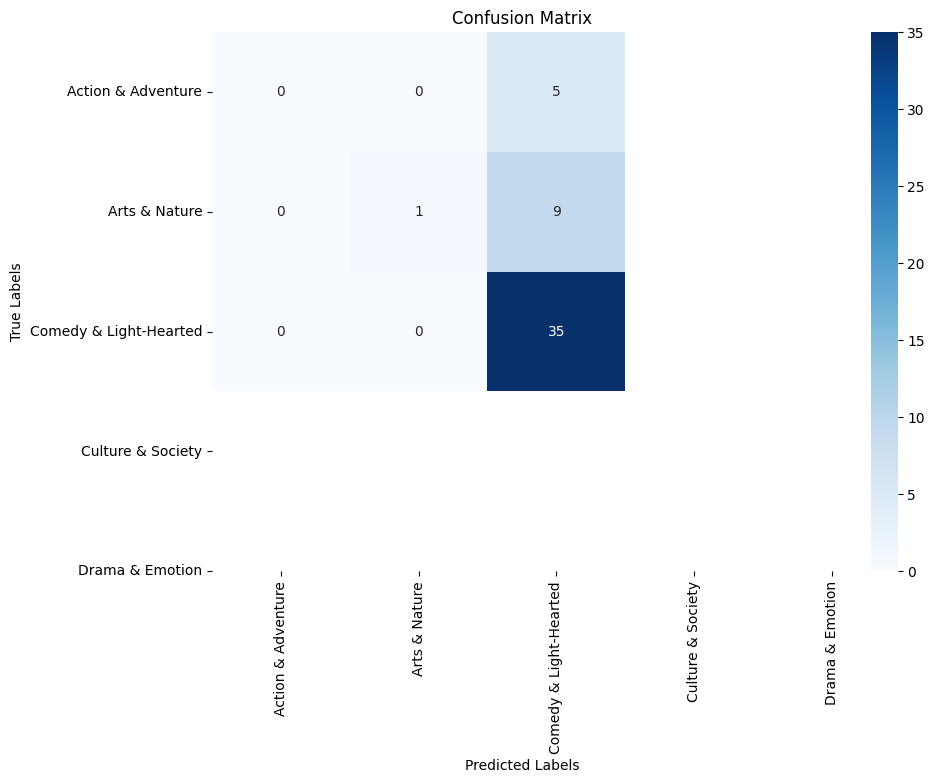

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)

In [ ]:
english_y_pred = english_log_reg.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.72
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00         5
Comedy & Light-Hearted       1.00      0.10      0.18        10
       Drama & Emotion       0.71      1.00      0.83        35

              accuracy                           0.72        50
             macro avg       0.57      0.37      0.34        50
          weighted avg       0.70      0.72      0.62        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


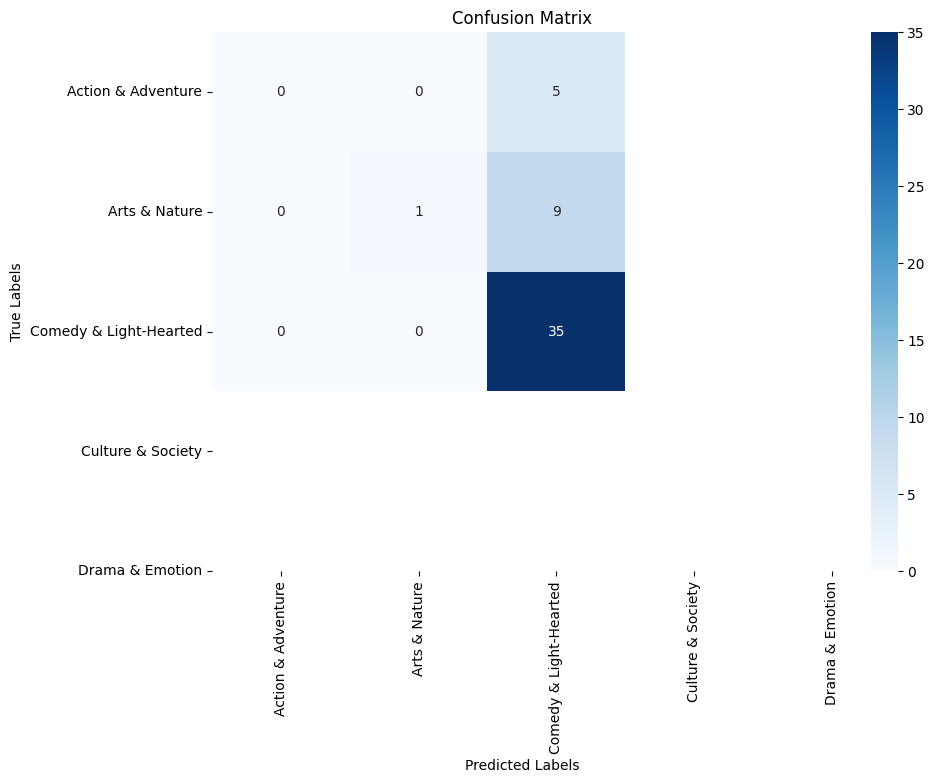

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)

In [ ]:
english_y_pred = english_log_reg.predict(english_X_test_tfidf)
english_accuracy = accuracy_score(english_y_test, english_y_pred)
english_classification_rep = classification_report(english_y_test, english_y_pred)

print(f"English Accuracy: {english_accuracy}")
print("English Classification Report:")
print(english_classification_rep)

English Accuracy: 0.72
English Classification Report:
                        precision    recall  f1-score   support

    Action & Adventure       0.00      0.00      0.00         5
Comedy & Light-Hearted       1.00      0.10      0.18        10
       Drama & Emotion       0.71      1.00      0.83        35

              accuracy                           0.72        50
             macro avg       0.57      0.37      0.34        50
          weighted avg       0.70      0.72      0.62        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


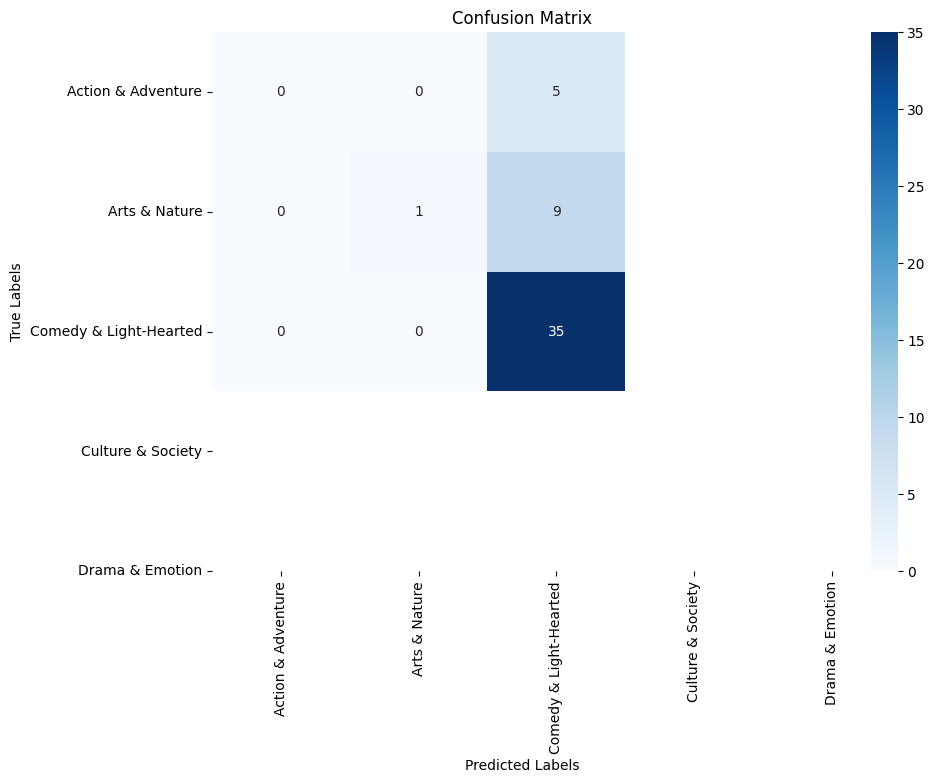

In [ ]:
plot_confusion_matrix(english_y_test, english_y_pred, english_class_names)